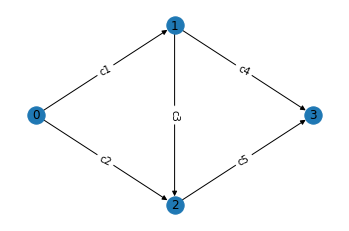

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(1,2),(1,3),(2,3)])

pos = {0: (40, 20), 1: (60, 35), 2: (60, 5), 3: (80, 20)}
node_labels=["o","a","b","c","d"]
labels = ['c1','c2','c3','c4','c5']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True)

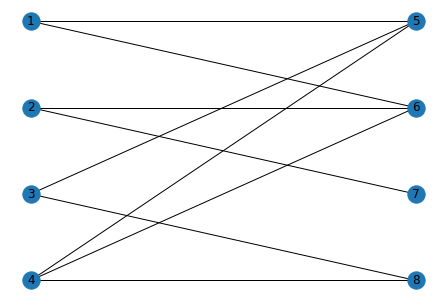

In [106]:
#EX 2
import networkx as nx
G = nx.Graph()
G.add_edges_from([(1,5),(1,6),(2,6),(2,7),(3,5),(3,8),(4,8),(4,6),(4,5)])

pos = {1:[0,4], 2:[0,2], 3:[0,0], 4:[0,-2], 5:[2,4],6:[2,2],7:[2,0],8:[2,-2]}

nx.draw(G, pos, with_labels=True)

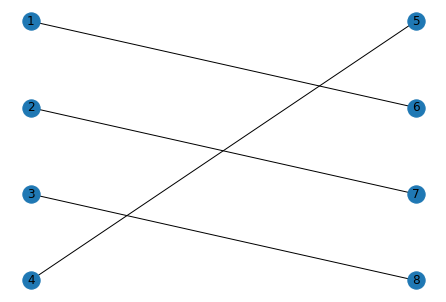

In [107]:
#The graph is bipartite with V0=[1,2,3,4] that represents people and V1=[5,6,7,8] that represents book
#Let's now find a perfect matching
G1 = nx.Graph()
G1.add_edges_from([(1,6),(2,7),(3,8),(4,5)])

pos = {1:[0,4], 2:[0,2], 3:[0,0], 4:[0,-2], 5:[2,4],6:[2,2],7:[2,0],8:[2,-2]}

nx.draw(G1, pos, with_labels=True)

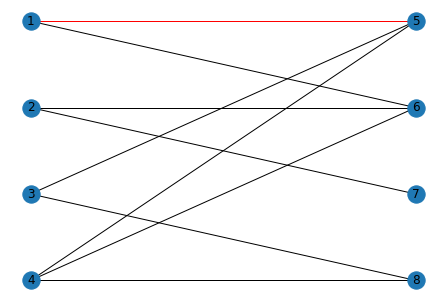

In [108]:
for u,v in G.edges():
    G[u][v]['color'] = 'black'
    
G[1][5]['color'] = 'red'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

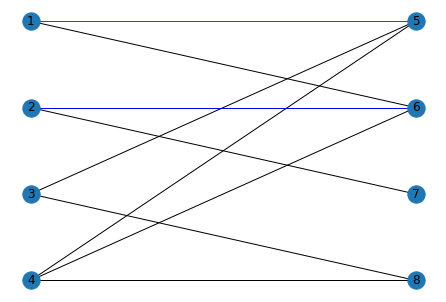

In [109]:
G[2][6]['color'] = 'blue'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

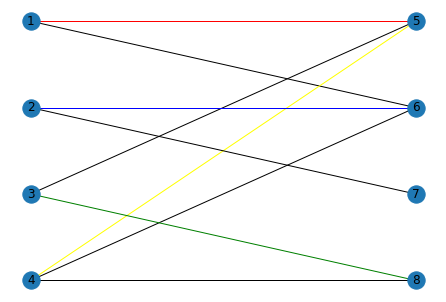

In [110]:
#Greedy algorithm fails!
G[3][8]['color'] = 'green'
G[4][5]["color"] = "yellow"

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

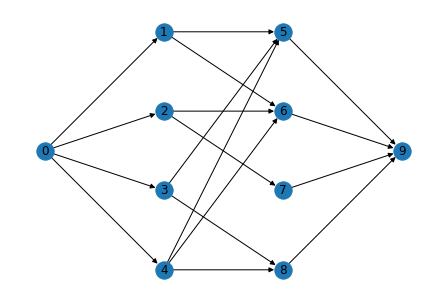

In [111]:
#Let's construct G2b:
G2b = nx.DiGraph()
G2b.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,5),(1,6),(2,6),(2,7),(3,5),(3,8),(4,8),(4,6),(4,5),(5,9),(6,9),(7,9),(8,9)])

pos = {0:[-2,1],1:[0,4], 2:[0,2], 3:[0,0], 4:[0,-2], 5:[2,4],6:[2,2],7:[2,0],8:[2,-2],9:[4,1]}

nx.draw(G2b, pos, with_labels=True)

In [112]:
for u,v in G2b.edges():
    G2b[u][v]['capacity'] = 1
flow_value, flow_dict = nx.maximum_flow(G2b,0,9)
flow_dict

{0: {1: 1, 2: 1, 3: 1, 4: 1},
 1: {5: 0, 6: 1},
 2: {6: 0, 7: 1},
 3: {5: 1, 8: 0},
 4: {8: 1, 6: 0, 5: 0},
 5: {9: 1},
 6: {9: 1},
 7: {9: 1},
 8: {9: 1},
 9: {}}

In [113]:
#Let's deduce the perfect matching now
tuple_list=[]
for u,v in G2b.edges():
    if flow_dict[u][v]==1 and u!=0 and v!=9:
        tuple_list.append((u,v))
print(tuple_list)

[(1, 6), (2, 7), (3, 5), (4, 8)]


In [142]:
#EX 2c
G2c = nx.DiGraph()
G2c.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,5),(1,6),(2,6),(2,7),(3,5),(3,8),(4,8),(4,6),(4,5),(5,9),(6,9),(7,9),(8,9)])

pos = {0:[-2,1],1:[0,4], 2:[0,2], 3:[0,0], 4:[0,-2], 5:[2,4],6:[2,2],7:[2,0],8:[2,-2],9:[4,1]}
for u,v in G2c.edges():
    if u==0:
        G2c[u][v]["capacity"] = np.inf
    elif (u==5 or u==6 or u==7 or u==8) and v==9:
        if u==6:
            G2c[u][v]['capacity'] = 3
        else:
            G2c[u][v]['capacity'] = 2
    else:    
        G2c[u][v]['capacity'] = 1
flow_value, flow_dict = nx.maximum_flow(G2c,0,9)
flow_dict

{0: {1: 1, 2: 2, 3: 2, 4: 3},
 1: {5: 0, 6: 1},
 2: {6: 1, 7: 1},
 3: {5: 1, 8: 1},
 4: {8: 1, 6: 1, 5: 1},
 5: {9: 2},
 6: {9: 3},
 7: {9: 1},
 8: {9: 2},
 9: {}}

In [143]:
for u,v in G2c.edges():
    print((u,v),G2c[u][v]["capacity"])

(0, 1) inf
(0, 2) inf
(0, 3) inf
(0, 4) inf
(1, 5) 1
(1, 6) 1
(2, 6) 1
(2, 7) 1
(3, 5) 1
(3, 8) 1
(4, 8) 1
(4, 6) 1
(4, 5) 1
(5, 9) 2
(6, 9) 3
(7, 9) 2
(8, 9) 2


In [144]:
tuple_list_pointc=[]
for u,v in G2c.edges():
    if flow_dict[u][v]==1 and u!=0 and v!=9:
        tuple_list_pointc.append((u,v))
print(tuple_list_pointc)

[(1, 6), (2, 6), (2, 7), (3, 5), (3, 8), (4, 8), (4, 6), (4, 5)]


{0: {1: 2, 2: 2, 3: 2, 4: 3},
 1: {5: 1, 6: 1},
 2: {6: 1, 7: 1},
 3: {5: 1, 8: 1},
 4: {8: 1, 6: 1, 5: 1},
 5: {9: 3},
 6: {9: 3},
 7: {9: 1},
 8: {9: 2},
 9: {}}

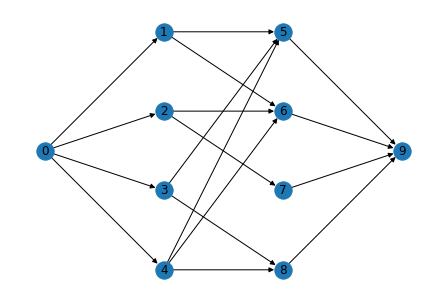

In [145]:
#EX 2d:
#Acting like the cell above says,8 books out of 9 are sold. If we sell 1 copy of book 3 and buy
# one copy of book 1, we obtain:
Gd = nx.DiGraph()
Gd.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,5),(1,6),(2,6),(2,7),(3,5),(3,8),(4,8),(4,6),(4,5),(5,9),(6,9),(7,9),(8,9)])

pos = {0:[-2,1],1:[0,4], 2:[0,2], 3:[0,0], 4:[0,-2], 5:[2,4],6:[2,2],7:[2,0],8:[2,-2],9:[4,1]}

nx.draw(Gd, pos, with_labels=True)
for u,v in Gd.edges():
    if u==0:
        Gd[u][v]["capacity"] = np.inf
    elif (u==5 or u==6 or u==7 or u==8) and v==9:
        if u==5:
            Gd[u][v]['capacity'] = 3
        elif u==7:
            Gd[u][v]["capacity"] = 1
        elif u==6:
            Gd[u][v]["capacity"] = 3
        else:
            Gd[u][v]['capacity'] = 2
    else:    
        Gd[u][v]['capacity'] = 1
flow_value, flow_dict = nx.maximum_flow(Gd,0,9)
flow_dict

In [146]:
for u,v in Gd.edges():
    print((u,v),Gd[u][v]["capacity"])

(0, 1) inf
(0, 2) inf
(0, 3) inf
(0, 4) inf
(1, 5) 1
(1, 6) 1
(2, 6) 1
(2, 7) 1
(3, 5) 1
(3, 8) 1
(4, 8) 1
(4, 6) 1
(4, 5) 1
(5, 9) 3
(6, 9) 3
(7, 9) 1
(8, 9) 2


In [147]:
tuple_list_pointd=[]
for u,v in Gd.edges():
    if flow_dict[u][v]==1 and u!=0 and v!=9:
        tuple_list_pointd.append((u,v))
print(tuple_list_pointd)

[(1, 5), (1, 6), (2, 6), (2, 7), (3, 5), (3, 8), (4, 8), (4, 6), (4, 5)]


In [102]:
#And that's it: all the books have been assigned now

In [126]:
#EX 3
import scipy.io
file = scipy.io.loadmat('capacities.mat')
capacities = file.get('capacities')
capacities = capacities.reshape(28,)
file = scipy.io.loadmat('traveltime.mat')
traveltime = file.get('traveltime')
traveltime = traveltime.reshape(28,)
file = scipy.io.loadmat('flow.mat')
flow = file.get('flow')
flow = flow.reshape(28,)
file = scipy.io.loadmat('traffic.mat')
traffic = file.get('traffic')

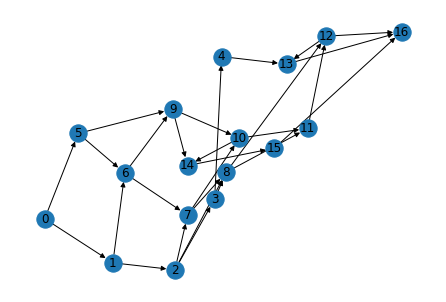

In [150]:
#Defining the graph of ex3
G3=nx.DiGraph()
head=None
tail=None
for i in range(28):
    for j in range(17):
    
        if traffic[j][i]==1:
            tail=j
        if traffic[j][i]==-1:
            head=j
        if head is not None and tail is not None:
            G3.add_edges_from([(tail,head)])
            #since we have i-th link here, we can add directly the capacity from capacities:
            G3[tail][head]["capacity"]=capacities[i]
    head=None
    tail=None
nx.draw(G3,with_labels=True)

In [151]:
#Let's find the shortest path between node 1 and 17 using the built-in function of nx
shortest_path=nx.shortest_path(G3,0,16)
for i in range(len(shortest_path)):
    print(shortest_path[i]+1)

1
2
3
9
13
17


In [136]:
#Let's find the maximum flow:

nx.maximum_flow(G3,0,16)

(22448,
 {0: {1: 8741, 5: 13707},
  1: {2: 8741, 6: 0},
  2: {3: 0, 7: 0, 8: 8741},
  3: {4: 0, 8: 0},
  4: {13: 0},
  5: {6: 4624, 9: 9083},
  6: {7: 4624, 9: 0},
  7: {8: 4624, 10: 0},
  8: {12: 6297, 11: 7068},
  12: {13: 3835, 16: 10355},
  13: {16: 3835},
  9: {10: 825, 14: 8258},
  10: {11: 825, 14: 0},
  14: {15: 8258},
  11: {12: 7893},
  16: {},
  15: {16: 8258}})

In [138]:
#Computation of nu
nu=traffic@flow
print(nu)

[ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In [101]:
#Define the new vector of flows for point d:
nu_d=[]
for i in range(17):
        nu_d.append(0)
nu_d[0]=nu[0]
nu_d[-1]=-nu[0]

In [ ]:
#Ex 3d
import cvxpy as cp
B=traffic
f = cp.Variable(len(G3.edges()))
print("f", f.shape)

f_2 = cp.reshape(f,(28,1))
# print("f_2", f_2.shape)

capacities_2 = np.reshape(capacities,(28,1))
print("capacities_2", capacities_2.shape)

capacities_inverse = np.empty(len(capacities))
print("capacities_inverse", capacities_inverse.shape)

for i in range(len(capacities)):
    capacities_inverse[i] = 1 / capacities_2[i]

capacities_inverse = np.reshape(capacities_inverse,(28,1))
print("capacities_inverse", capacities_inverse.shape)

traveltime_2 = np.reshape(traveltime,(28,1))
print("traveltime_2", traveltime_2.shape)
#This is a matrix which has, on the diagonal i,i the product Ci*li
matrix1 = capacities_2 @ traveltime_2.T
print("matrix1", matrix1.shape)
#This is a matrix which has, on the diagonal i,i the quantity 1-(fi/Ci)
matrix2 = np.eye(len(capacities)) - f_2 @ capacities_inverse.T
print("matrix2", matrix2.shape)

objective_function = cp.diag(matrix1) @ cp.inv_pos(cp.diag(matrix2)).T
print("objective_function", objective_function.shape)

fin_objective_function = objective_function - traveltime_2.T @ capacities_2
print(fin_objective_function.shape)
objective = cp.Minimize(fin_objective_function)
nu = nu_d
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by prob.solve()
cost_opt = prob.solve()
opt_flow = f.value
print("Social optimal flow:", opt_flow)
print("Optimal cost:", result)

In [ ]:
#Ex 3e
B = traffic
n_edges = len(G3.edges())

f = cp.Variable(len(G3.edges()))
print("f", f.shape)

f_2 = cp.reshape(f,(28,1))
print("f_2", f_2.shape)

capacities_2 = np.reshape(capacities,(28,1))
print("capacities_2", capacities_2.shape)


traveltime_2 = np.reshape(traveltime,(28,1))
print("traveltime_2", traveltime_2.shape)
#This is the product between capacities vector and traveltime vector to obtain Ce*le on the diagonal of the resultant matrix
matrix1_e = capacities_2 @ traveltime_2.T
print("matrix1_e", matrix1_e.shape)
#I isolate the diagonal
diag_matrix1_e=cp.diag(matrix1_e)
diag_matrix1_e_reshape=cp.reshape(diag_matrix1_e,(28,1))
print("diag_matrix1_e_reshape",diag_matrix1_e_reshape.shape)
#This is the difference Ce-fe
diff_vector=  capacities_2-f_2
print("diff_vector", diff_vector.shape)

#In the end I multiply diag_matrix1 and the logaritm of diag(matrix2) in order to obtain the final objective function
objective_function = diag_matrix1_e_reshape.T @ (cp.log(capacities_2)-cp.log(diff_vector))
print("objective_function", objective_function.shape)

objective = cp.Minimize(objective_function)
nu = nu_d
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by prob.solve().
result = prob.solve()
wardrop_flows=f.value
print("Wardrop flows:", f.value)

In [ ]:
#Ex 3f
B = traffic
n_edges = len(G3.edges())

f = cp.Variable(len(G3.edges()))
print("f", f.shape)

f_2 = cp.reshape(f,(28,1))
print("f_2", f_2.shape)

capacities_2 = np.reshape(capacities,(28,1))
print("capacities_2", capacities_2.shape)


traveltime_2 = np.reshape(traveltime,(28,1))
print("traveltime_2", traveltime_2.shape)
#This is the product between capacities vector and traveltime vector to obtain Ce*le on the diagonal of the resultant matrix
matrix1_f = capacities_2 @ traveltime_2.T
print("matrix1_f", matrix1_f.shape)
#I isolate the diagonal
diag_matrix1_f=cp.diag(matrix1_f)
diag_matrix1_f_reshape=cp.reshape(diag_matrix1_f,(28,1))
#I define omega:
omega= diag_matrix1_f_reshape @ cp.inv_pos(cp.power(capacities_2-cp.reshape(opt_flow,(28,1)),2)).T
print("omega", omega.shape)
print("optimal flow",opt_flow.shape)
final_omega= cp.reshape(opt_flow,(28,1))@ cp.reshape(cp.diag(omega),(28,1)).T
print("final omega",omega.shape)
print("diag_matrix1_e_reshape",diag_matrix1_e_reshape.shape)
#This is the difference Ce-fe
diff_vector=  capacities_2-f_2
print("diff_vector", diff_vector.shape)

# I sum omega@f to the previous objective_function since it is the result of the integral
objective_function = diag_matrix1_e_reshape.T @ (cp.log(capacities_2)-cp.log(diff_vector)) + cp.diag(final_omega).T @ f_2
print("objective_function", objective_function.shape)

objective = cp.Minimize(objective_function)
nu = nu_d
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by prob.solve().
result = prob.solve()
wardrop_with_tolls=f.value
print("Wardrop flows:", f.value)

In [140]:
#It's interesting to notice that now the Wardrop flows, with tolls, are very very close to the social optimum, as expected
wardrop_with_tolls-opt_flow

NameError: name 'wardrop_with_tolls' is not defined

In [148]:
#Ex 3g
#The last point will be divided into more cells since there is the need to computenew
#social optimum with the new cost and the new Wardrop equilibrium
#Recomputing social optimum with the new cost:
B=traffic
f = cp.Variable(len(G3.edges()))
print("f", f.shape)

f_2 = cp.reshape(f,(28,1))
# print("f_2", f_2.shape)

capacities_2 = np.reshape(capacities,(28,1))
print("capacities_2", capacities_2.shape)

capacities_inverse = np.empty(len(capacities))
print("capacities_inverse", capacities_inverse.shape)

for i in range(len(capacities)):
    capacities_inverse[i] = 1 / capacities_2[i]

capacities_inverse = np.reshape(capacities_inverse,(28,1))
print("capacities_inverse", capacities_inverse.shape)

traveltime_2 = np.reshape(traveltime,(28,1))
print("traveltime_2", traveltime_2.shape)

matrix1 = capacities_2 @ traveltime_2.T
print("matrix1", matrix1.shape)

matrix2 = np.eye(len(capacities)) - f_2 @ capacities_inverse.T
print("matrix2", matrix2.shape)

objective_function = cp.diag(matrix1) @ cp.inv_pos(cp.diag(matrix2)).T 
print("objective_function", objective_function.shape)

fin_objective_function_for_last_point = objective_function - traveltime_2.T @ capacities_2 -f_2.T@traveltime_2
print(fin_objective_function.shape)
objective = cp.Minimize(fin_objective_function_for_last_point)
nu = nu_d
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by prob.solve().
new_cost_opt = prob.solve()
new_opt_flow = f.value
print("New social optimal flow:", new_opt_flow)
print("New optimal cost:", new_cost_opt)

In [149]:
#recompute the tolls and the new Wardrop equilibrium
B = traffic
n_edges = len(G3.edges())

f = cp.Variable(len(G3.edges()))
print("f", f.shape)

f_2 = cp.reshape(f,(28,1))
print("f_2", f_2.shape)

capacities_2 = np.reshape(capacities,(28,1))
print("capacities_2", capacities_2.shape)


traveltime_2 = np.reshape(traveltime,(28,1))
print("traveltime_2", traveltime_2.shape)
#This is the product between capacities vector and traveltime vector to obtain Ce*le on the diagonal of the resultant matrix
matrix1_f = capacities_2 @ traveltime_2.T
print("matrix1_f", matrix1_f.shape)
#I isolate the diagonal
diag_matrix1_f=cp.diag(matrix1_f)
diag_matrix1_f_reshape=cp.reshape(diag_matrix1_f,(28,1))
#I re-define omega with the optimal flow I have computed into the previous point:
new_omega= diag_matrix1_f_reshape @ cp.inv_pos(cp.power(capacities_2-cp.reshape(new_opt_flow,(28,1)),2)).T
print("new_omega", new_omega.shape)
print("new_optimal flow",new_opt_flow.shape)
new_final_omega= cp.reshape(new_opt_flow,(28,1)) @ cp.reshape(cp.diag(new_omega),(28,1)).T
print("new final omega",new_final_omega.shape)
print("diag_matrix1_f_reshape",diag_matrix1_f_reshape.shape)
#This is the difference Ce-fe
diff_vector=  capacities_2-f_2
print("diff_vector", diff_vector.shape)

# I sum omega@f to the previous objective_function since it is the result of the integral
new_objective_function = diag_matrix1_f_reshape.T @ (cp.log(capacities_2)-cp.log(diff_vector)) + cp.diag(new_final_omega).T @ f_2- f_2.T@traveltime_2
print("New objective_function", new_objective_function.shape)

objective = cp.Minimize(new_objective_function)
nu = nu_d
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by prob.solve().
result = prob.solve()
wardrop_with_tolls_new=f.value
print("New Wardrop flows with tolls:", wardrop_with_tolls_new)

NameError: name 'cp' is not defined

In [ ]:
wardrop_with_tolls_new-new_opt_flow